In [1]:
import pandas as pd  

In [2]:
df = pd.read_csv("modified_file_jan_to_jun.csv")

In [3]:
df.head(10)

,Transaction,Item,date_time
0,1,_tempat_tidur_sedang_laci,2024-06-23
1,2,tempat_tidur_twins,2024-06-16
2,3,_tempat_tidur_sedang,2024-01-21
3,4,_tempat_tiidur_kecil,2024-04-30
4,5,tempat_tiidur_tanggung,2024-04-01
5,6,_set_tamu_,2024-04-13
6,7,_set_tamu_,2024-04-08
7,7,_tempat_tidur_sedang,2024-01-30
8,8,_tempat_tidur_sedang,2024-01-30
9,9,_mm_kamar,2024-02-26


In [4]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d')
# df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

In [5]:
df['year_month_day'] = df['date_time'].dt.to_period('D')

In [6]:


daily_transactions = df.groupby('year_month_day')['Transaction'].nunique().reset_index()

daily_transactions.columns = ['date', 'unique_transactions']


print(daily_transactions)


specific_day = '2024-01-01'
total_unique_transactions_specific_day = daily_transactions[daily_transactions['date'] == specific_day]['unique_transactions'].sum()
print(f"Total unique transactions on {specific_day}: {total_unique_transactions_specific_day}")


           date  unique_transactions
0    2024-01-01                    2
1    2024-01-02                    8
2    2024-01-03                    6
3    2024-01-04                    5
4    2024-01-05                    4
..          ...                  ...
174  2024-06-26                    1
175  2024-06-27                    2
176  2024-06-28                    4
177  2024-06-29                    7
178  2024-06-30                    7

[179 rows x 2 columns]
Total unique transactions on 2024-01-01: 2


In [7]:
specific_day = '2024-01-01'
total_unique_transactions_specific_day = daily_transactions[daily_transactions['date'] == specific_day]['unique_transactions'].sum()
print(f"Total unique transactions on {specific_day}: {total_unique_transactions_specific_day}")

# Checking the total unique transactions for each month to ensure data integrity
df['year_month'] = pd.to_datetime(df['date_time']).dt.to_period('M')
monthly_transactions = df.groupby('year_month')['Transaction'].nunique().reset_index()
monthly_transactions.columns = ['year_month', 'unique_transactions']

# Displaying the dataframes
print("Daily Unique Transactions:")
print(daily_transactions.head())

print("Monthly Unique Transactions:")
print(monthly_transactions.head())

Total unique transactions on 2024-01-01: 2
Daily Unique Transactions:
         date  unique_transactions
0  2024-01-01                    2
1  2024-01-02                    8
2  2024-01-03                    6
3  2024-01-04                    5
4  2024-01-05                    4
Monthly Unique Transactions:
  year_month  unique_transactions
0    2024-01                  142
1    2024-02                  128
2    2024-03                  131
3    2024-04                  137
4    2024-05                  132


C:\Users\tegar\AppData\Local\Temp\ipykernel_17120\1483669005.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)
C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


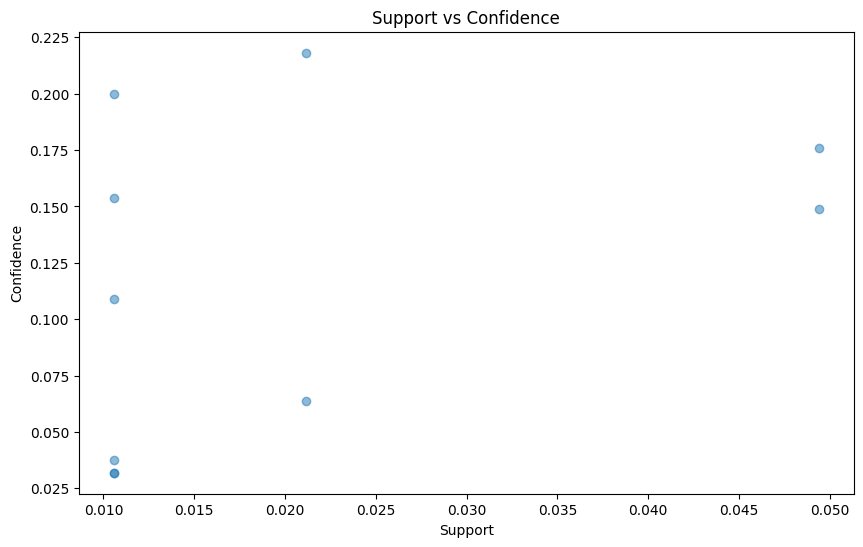

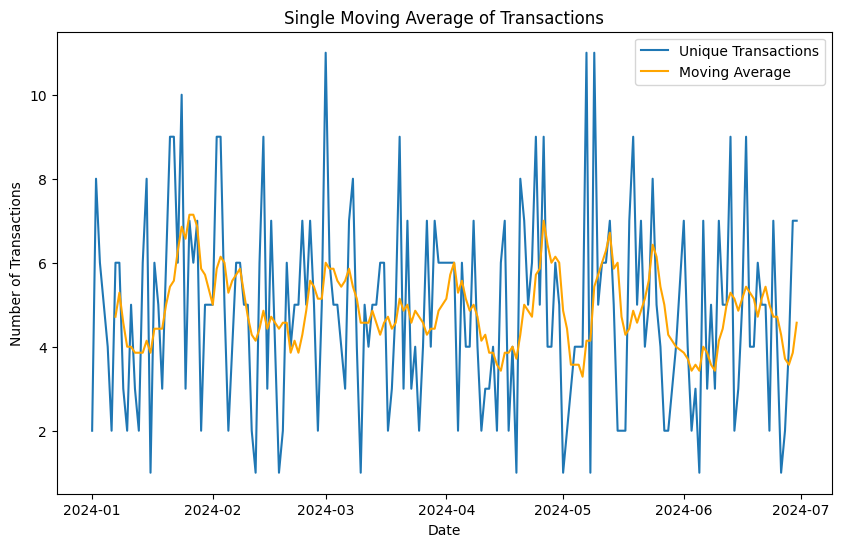

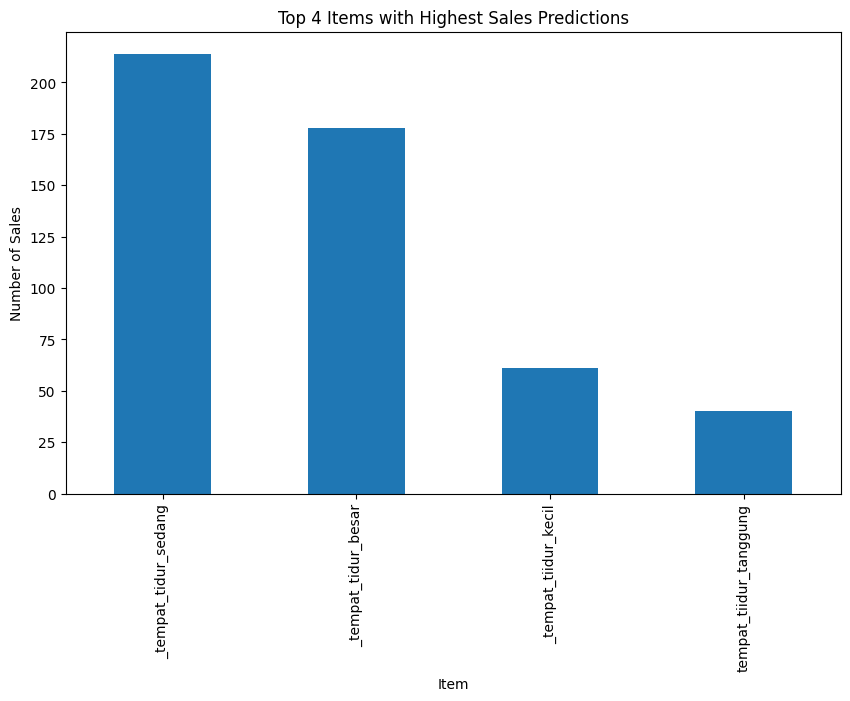

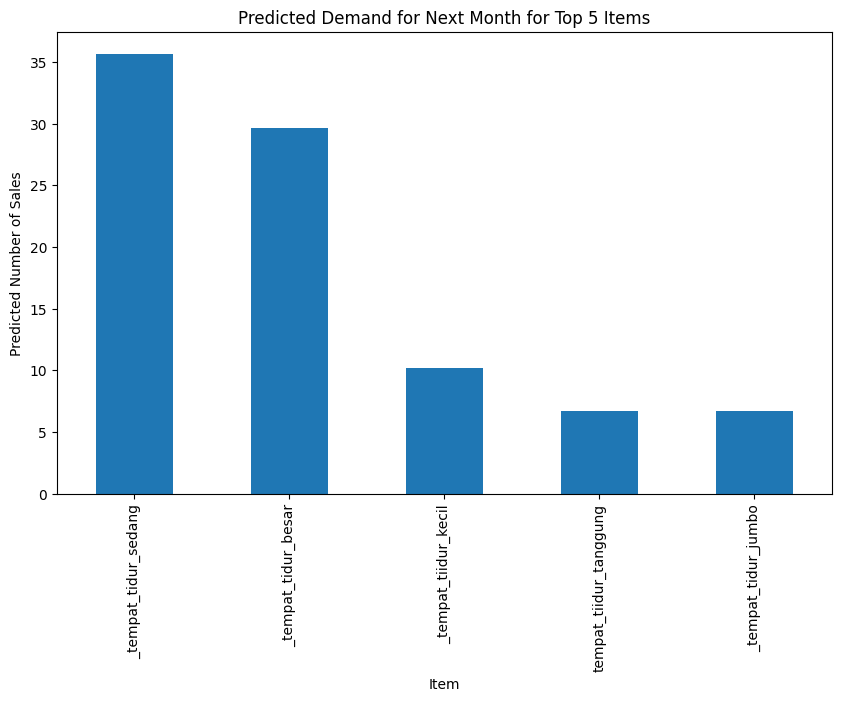

(     support                                        itemsets
 0   0.015873                                 (_lemari_sudut)
 1   0.014109                                  (_meja_tv_100)
 2   0.015873                                  (_meja_tv_150)
 3   0.010582                                     (_mm_kamar)
 4   0.052910                             (_rak_sepatu+kursi)
 5   0.015873                                    (_set_sudut)
 6   0.051146                                    (_set_tamu_)
 7   0.010582                                  (_set_tamu_TK)
 8   0.024691                           (_set_tamu_sedan_211)
 9   0.024691                            (_tempat_tidur_anak)
 10  0.280423                           (_tempat_tidur_besar)
 11  0.063492                           (_tempat_tidur_jumbo)
 12  0.331570                          (_tempat_tidur_sedang)
 13  0.029982                     (_tempat_tidur_sedang_laci)
 14  0.015873                    (_tempat_tidur_sedang_laciL)
 15  0.0

In [8]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt


# Prepare the data for the Apriori algorithm
basket = (df.groupby(['Transaction', 'Item'])['Item']
          .count().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

# Convert values to 1 and 0
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Apply the Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)

# Plot 1: Support and Confidence of Items
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Extracting date for daily transactions
df['date'] = df['date_time'].dt.date

# Calculating daily unique transactions
daily_transactions = df.groupby('date')['Transaction'].nunique().reset_index()
daily_transactions.columns = ['date', 'unique_transactions']

# Apply Single Moving Average
window_size = 7
daily_transactions['moving_average'] = daily_transactions['unique_transactions'].rolling(window=window_size).mean()

# Plot 2: Single Moving Average of Transactions
plt.figure(figsize=(10, 6))
plt.plot(daily_transactions['date'], daily_transactions['unique_transactions'], label='Unique Transactions')
plt.plot(daily_transactions['date'], daily_transactions['moving_average'], label='Moving Average', color='orange')
plt.title('Single Moving Average of Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

# Plot 3: Top 4 Items with Highest Sales Predictions
top_items = df['Item'].value_counts().head(4)
top_items.plot(kind='bar', figsize=(10, 6))
plt.title('Top 4 Items with Highest Sales Predictions')
plt.xlabel('Item')
plt.ylabel('Number of Sales')
plt.show()

# Predicting next month's demand for the top 5 items
df['year_month'] = df['date_time'].dt.to_period('M')
monthly_sales = df.groupby(['year_month', 'Item']).size().reset_index(name='count')
top_5_items = df['Item'].value_counts().head(5).index

predictions = {}
for item in top_5_items:
    item_sales = monthly_sales[monthly_sales['Item'] == item]
    avg_sales_per_month = item_sales['count'].mean()
    predictions[item] = avg_sales_per_month

# Plot 4: Predicted Demand for Next Month for Top 5 Items
plt.figure(figsize=(10, 6))
pd.Series(predictions).plot(kind='bar')
plt.title('Predicted Demand for Next Month for Top 5 Items')
plt.xlabel('Item')
plt.ylabel('Predicted Number of Sales')
plt.show()

# Display the results
frequent_itemsets, rules[['antecedents', 'consequents', 'support', 'confidence']], daily_transactions.head(20), top_items, predictions

